In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

from TimeSeriesCrossValidation import splitTrain, splitTrainVal, splitTrainValTest

timeSeries = np.arange(27)
timeSeries

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [49]:
def show_train(X, y, num):
    for j in np.arange(num):
        print("--------- SET %d ---------" % (j+1))
        print("X[%d] ="% (j+1), X[j])
        print("y[%d] ="% (j+1), y[j])

def show_train_val(X, y, Xcv, ycv, num):
    for j in np.arange(num):
        print("--------- SET %d ---------" % (j+1))
        print("X[%d] ="% (j+1), *X[j])
        print("y[%d] ="% (j+1), *y[j])
        print("Xcv[%d] ="% (j+1), *Xcv[j])
        print("ycv[%d] ="% (j+1), *ycv[j])
        
def show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, num):
    for j in np.arange(num):
        print("--------- SET %d ---------" % (j+1))
        print("X[%d] ="% (j+1), *X[j])
        print("y[%d] ="% (j+1), *y[j])
        print("Xcv[%d] ="% (j+1), *Xcv[j])
        print("ycv[%d] ="% (j+1), *ycv[j])
        print("Xtest[%d] ="% (j+1), *Xtest[j])
        print("ytest[%d] ="% (j+1), *ytest[j])

In [50]:
def plot_train(X, y, algo):
    fig, ax = plt.subplots(figsize=(20, 13))
    ax.plot(timeSeries, len(timeSeries) * [len(X)-0.75], lw=3, c='k')
    k = 1./max([len(x)+2 for x in X])
    k = 0
    numSets = len(X)
    level = 10
    for i in np.arange(len(X)):
        plt.plot(X[i], len(X[i]) * [numSets-i-1-k*level], lw=4, c='blue')
        plt.plot([X[i][-1], y[i][0]], 2*[numSets-i-1-k*level], lw=2, c='blue')
        plt.plot(y[i], len(y[i]) * [numSets-i-1-k*level], lw=4, c='lightblue')
    ax.grid(which='minor')
    ax.set_yticks(np.arange(len(X), 0, -1)-1)
    ax.set_yticklabels(np.arange(1, len(X)+1, 1))
    ax.set_ylabel("Train set", size=16)
    custom_lines = [Line2D([0], [0], color='k', lw=4), 
                    Line2D([0], [0], color='blue', lw=4), Line2D([0], [0], color='lightblue', lw=4)]
    ax.legend(custom_lines, ['Original Time-Series', 
                             'X (Train input)', 'y (Train output)' ], 
              loc='upper center', ncol=3, handleheight=2.4, labelspacing=0.05)
    ax.set_ylim([-.5, len(X)])
    ax.set_title(algo, size=18);
    plt.grid('minor')
    plt.show()

def plot_train_val(X, y, Xcv, ycv, algo):
    fig, ax = plt.subplots(figsize=(20, 13))
    ax.plot(timeSeries, len(timeSeries) * [len(X)-0.75], lw=3, c='k')
    k = 1./max([len(x)+2 for x in X.values()])
    numSets = len(X)
    for i in np.arange(numSets):
        sorted_arr = np.sort(np.array([x[0] for x in np.concatenate((X[i], Xcv[i]), axis=0)]))
        for j in np.arange(len(X[i])):
            level = sum(sorted_arr<X[i][j][0])
            plt.plot(X[i][j], len(X[i][j]) * [numSets-i-1-k*level], lw=3, c='blue')
            plt.plot([X[i][j][-1], y[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='blue')
            plt.plot(y[i][j], len(y[i][j]) * [numSets-i-1-k*level], lw=3, c='lightblue')
        for j in np.arange(len(Xcv[i])):
            level = sum(sorted_arr<Xcv[i][j][0])
            plt.plot(Xcv[i][j], len(Xcv[i][j]) * [numSets-i-1-k*level], lw=3, c='red')
            plt.plot([Xcv[i][j][-1], ycv[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='red')
            plt.plot(ycv[i][j], len(ycv[i][j]) * [numSets-i-1-k*level], lw=3, c='tomato')
        rect = patches.Rectangle((0, len(X)-i-1), len(timeSeries)-1, k*(-len(sorted_arr)+1), 
                                 ls='-.', linewidth=1, edgecolor='k',facecolor='lavender')
        ax.add_patch(rect)
    ax.grid(which='minor')
    ax.set_yticks(np.arange(len(X), 0, -1)-1)
    ax.set_yticklabels(np.arange(1, len(X)+1, 1))
    ax.set_ylabel("Train and validation set", size=16)
    custom_lines = [Line2D([0], [0], color='k', lw=4),    patches.Patch(facecolor='lavender', edgecolor='k'),
                    Line2D([0], [0], color='blue', lw=4), Line2D([0], [0], color='lightblue', lw=4),
                    Line2D([0], [0], color='red', lw=4),  Line2D([0], [0], color='tomato', lw=4)]
    ax.legend(custom_lines, ['Original Time-Series', 'Train and Validation set', 
                             'X (Train input)', 'y (Train output)', 
                             'Xcv (Cross-validation input)', 'ycv (Cross-validation output)'], 
              loc='upper center', ncol=3, handleheight=2.4, labelspacing=0.05)
    ax.set_ylim([-1.5, len(X)])
    ax.set_title(algo, size=18);
    plt.show()
    
def plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, algo):    
    fig, ax = plt.subplots(figsize=(20, 13))
    ax.plot(timeSeries, len(timeSeries) * [len(X)-0.75], lw=3, c='k')
    k = 1./max([len(x)+2 for x in X.values()])
    numSets = len(X)
    for i in np.arange(numSets):
        sorted_arr = np.sort(np.array([x[0] for x in np.concatenate((X[i], Xcv[i], Xtest[i]), axis=0)]))
        for j in np.arange(len(X[i])):
            level = sum(sorted_arr<X[i][j][0])
            plt.plot(X[i][j], len(X[i][j]) * [numSets-i-1-k*level], lw=3, c='blue')
            plt.plot([X[i][j][-1], y[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='blue')
            plt.plot(y[i][j], len(y[i][j]) * [numSets-i-1-k*level], lw=3, c='lightblue')
        for j in np.arange(len(Xcv[i])):
            level = sum(sorted_arr<Xcv[i][j][0])
            plt.plot(Xcv[i][j], len(Xcv[i][j]) * [numSets-i-1-k*level], lw=3, c='red')
            plt.plot([Xcv[i][j][-1], ycv[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='red')
            plt.plot(ycv[i][j], len(ycv[i][j]) * [numSets-i-1-k*level], lw=3, c='tomato')
        for j in np.arange(len(Xtest[i])):
            level = sum(sorted_arr<Xtest[i][j][0])
            plt.plot(Xtest[i][j], len(Xtest[i][j]) * [numSets-i-1-k*level], lw=3, c='green')
            plt.plot([Xtest[i][j][-1], ytest[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='green')
            plt.plot(ytest[i][j], len(ytest[i][j]) * [numSets-i-1-k*level], lw=3, c='lightgreen')
        rect = patches.Rectangle((0, len(X)-i-1), len(timeSeries)-1, k*(-len(sorted_arr)+1), 
                                 ls='-.', linewidth=1, edgecolor='k',facecolor='lavender')
        ax.add_patch(rect)
    ax.grid(which='minor')
    ax.set_yticks(np.arange(len(X), 0, -1)-1)
    ax.set_yticklabels(np.arange(1, len(X)+1, 1))
    ax.set_ylabel("Train, validation and test set", size=16)
    custom_lines = [Line2D([0], [0], color='k', lw=4),    patches.Patch(facecolor='lavender', edgecolor='k'),
                    Line2D([0], [0], color='blue', lw=4), Line2D([0], [0], color='lightblue', lw=4),
                    Line2D([0], [0], color='red', lw=4),  Line2D([0], [0], color='tomato', lw=4),
                    Line2D([0], [0], color='green', lw=4),  Line2D([0], [0], color='lightgreen', lw=4)]
    ax.legend(custom_lines, ['Original Time-Series', 'Train, validation and test set', 
                             'X (Train input)', 'y (Train output)', 
                             'Xcv (Cross-validation input)', 'ycv (Cross-validation output)',
                             'Xtest (Test input)', 'ytest (Test output)'], 
              loc='upper center', ncol=4, handleheight=2.4, labelspacing=0.05)
    ax.set_ylim([-1.5, len(X)])
    ax.set_title(algo, size=18);
    plt.show()

--------- SET 1 ---------
X[1] = [0 1 2 3]
y[1] = [4 5 6]
--------- SET 2 ---------
X[2] = [3 4 5 6]
y[2] = [7 8 9]
--------- SET 3 ---------
X[3] = [6 7 8 9]
y[3] = [10 11 12]
--------- SET 4 ---------
X[4] = [ 9 10 11 12]
y[4] = [13 14 15]
--------- SET 5 ---------
X[5] = [12 13 14 15]
y[5] = [16 17 18]


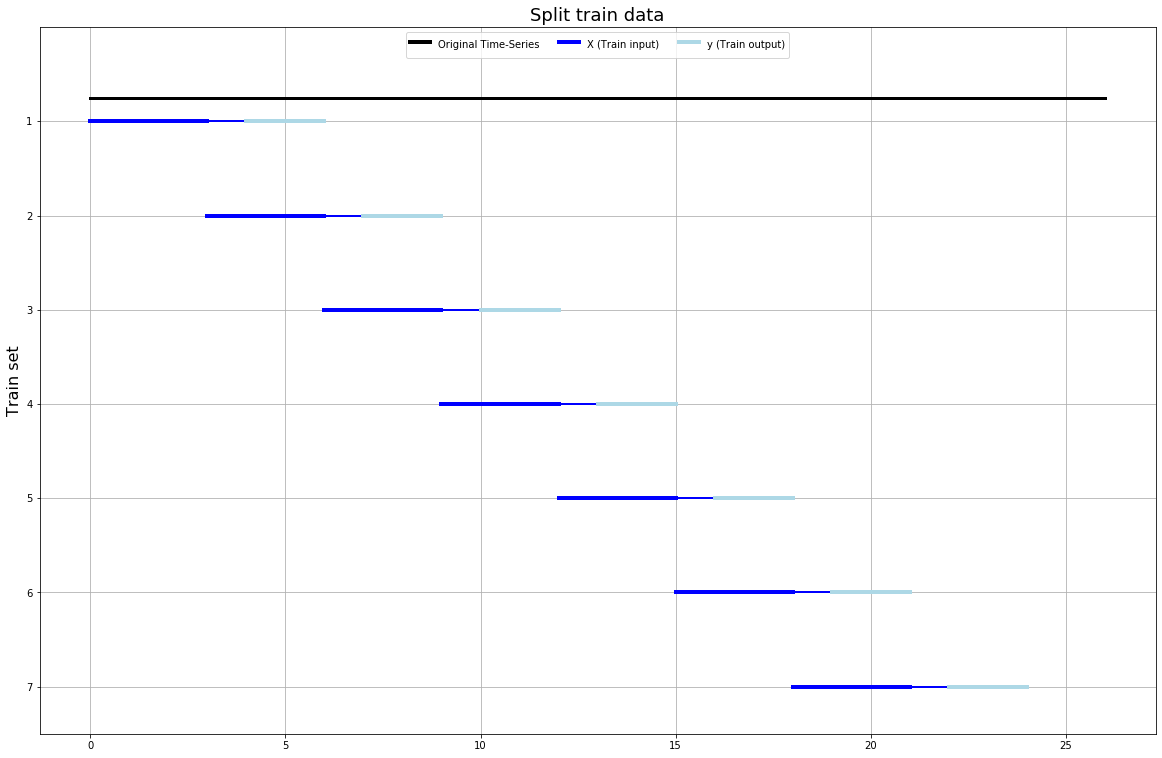

In [42]:
X, y = splitTrain.split_train(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=3)

show_train(X, y, 5)
    
plot_train(X, y, "Split train data")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5]
y[1] = [4 5 6] [6 7 8]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7]
y[2] = [4 5 6] [6 7 8] [ 8  9 10]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14]
Xcv[4] = [12 13 14 15]
ycv[4] = [16 17 18]
--------- SET 5 ---------
X[5] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [10 11 12 13]
y[5] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [14 15 16]
Xcv[5] = [14 15 16 17]
ycv[5] = [18 19 20]


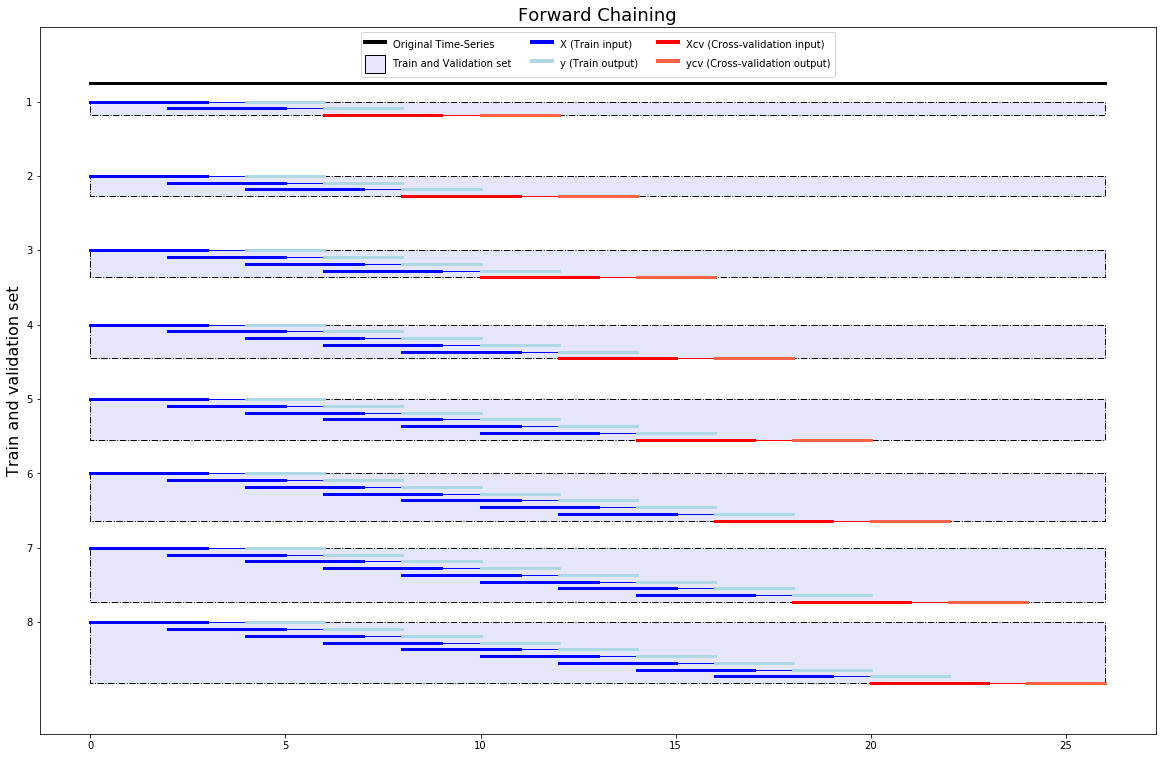

In [43]:
X, y, Xcv, ycv = splitTrainVal.split_train_val_forwardChaining(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)

show_train_val(X, y, Xcv, ycv, 5)
    
plot_train_val(X, y, Xcv, ycv, "Forward Chaining")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [10 11 12 13] [12 13 14 15] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [14 15 16] [16 17 18] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [12 13 14 15] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [16 17 18] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [20 21 22] [22 23 24] [2

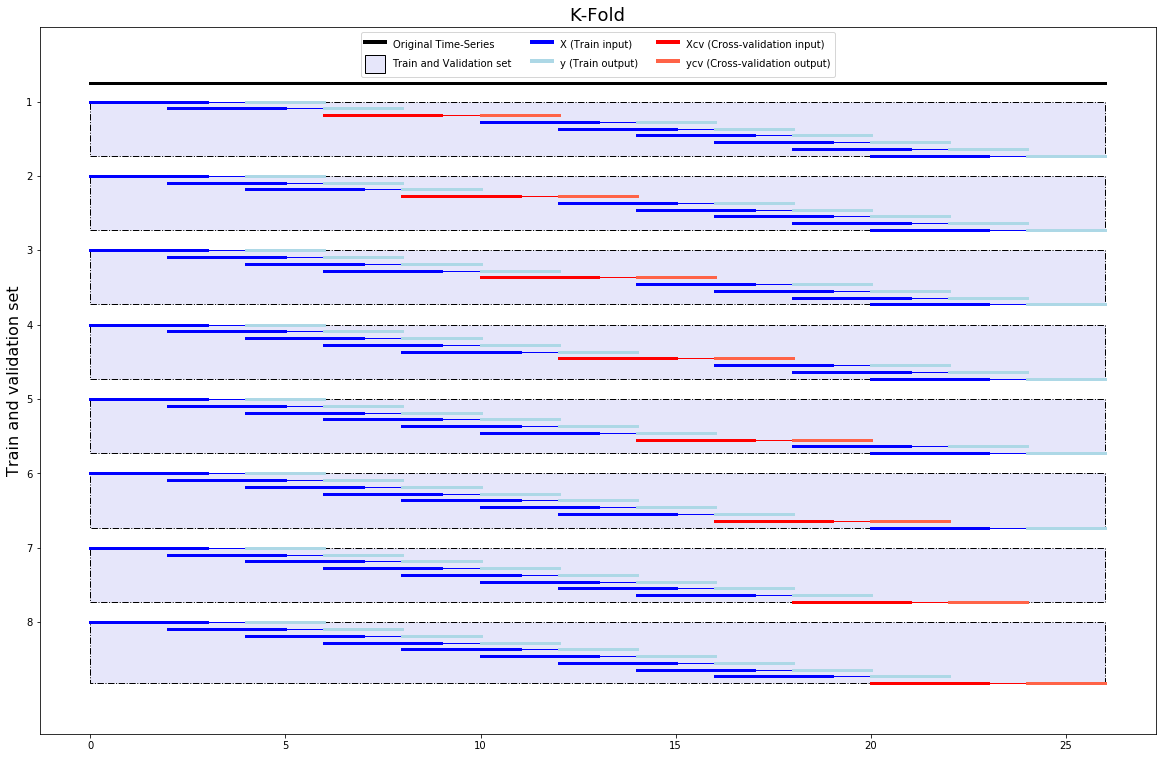

In [44]:
X, y, Xcv, ycv = splitTrainVal.split_train_val_kFold(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)

show_train_val(X, y, Xcv, ycv, 5)
    
plot_train_val(X, y, Xcv, ycv, "K-Fold")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[1] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [18 19 20] [20 21 22] [22 23 24]
Xcv[1] = [10 11 12 13]
ycv[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [12 13 14 15] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [16 17 18] [18 19 20] [20 21 22] [22 23 24]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [10 11 12 13] [12 13 14 15] [14 15 16 17] [16 17 18 19]
y[3] = [4 5 6] [6 7 8] [14 15 16] [16 17 18] [18 19 20] [20 21 22]
Xcv[3] = [6 7 8 9] [20 21 22 23]
ycv[3] = [10 11 12] [24 25 26]
--------- SET 4 ---------
X[4] = [0 1 2 3] [ 8  9 10 11] [10 11 12 13] [12 13 14 15] [14 15 16 17]
y[4] = [4 5 6] [12 13 14] [14 15 16] [16 17 18] [18 19 20]
Xcv[4] = [4 5 6 7] [18 19 20 21]
ycv[4] = [ 8  9 10] [22 23 24]
--------- SET 5 ---------
X[5] = [4 5 6 7] [6 7 8 9] [ 8  9 10

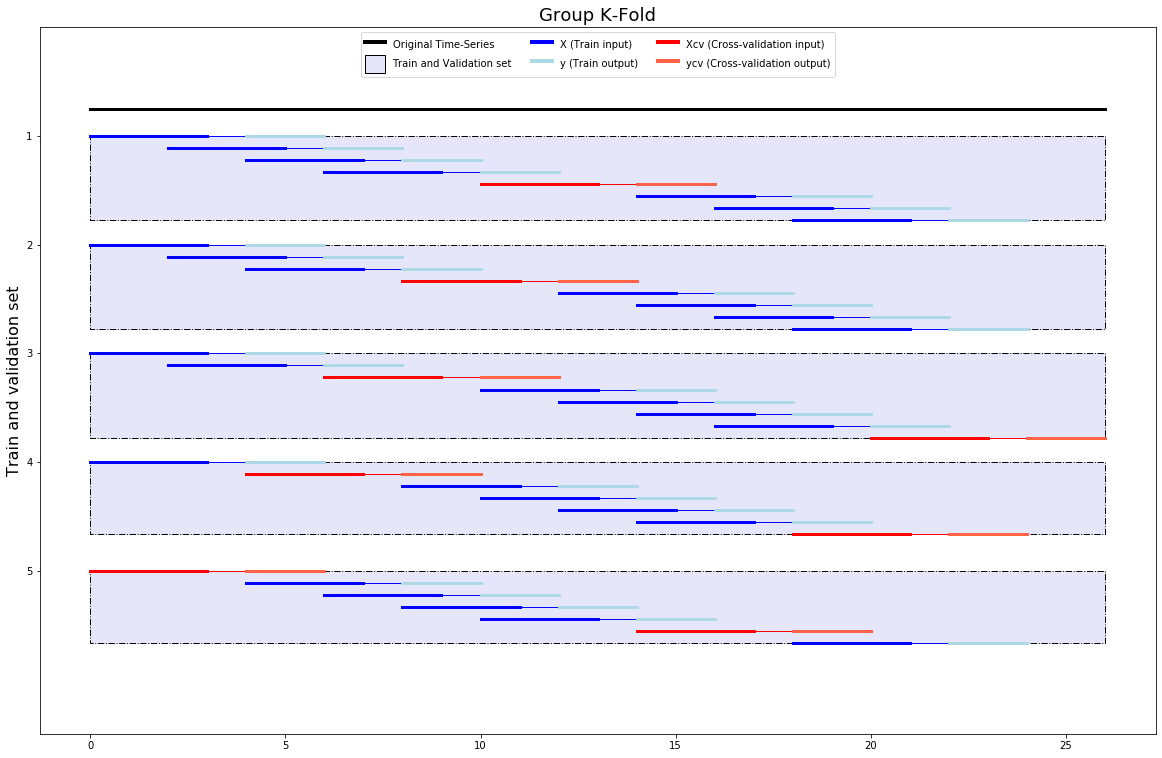

In [45]:
X, y, Xcv, ycv = splitTrainVal.split_train_val_groupKFold(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)

show_train_val(X, y, Xcv, ycv, 5)
    
plot_train_val(X, y, Xcv, ycv, "Group K-Fold")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5]
y[1] = [4 5 6] [6 7 8]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
Xtest[1] = [10 11 12 13]
ytest[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7]
y[2] = [4 5 6] [6 7 8] [ 8  9 10]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
Xtest[3] = [14 15 16 17]
ytest[3] = [18 19 20]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14]
Xcv[4] = [12 13 14 15]
ycv[4] = [16 17 18]
Xtest[4] = [16 17 18 19]
ytest[4] = [20 21 22]
--------- SET 5 ---------
X[5] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [10 11 12 13]
y[5] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [14 15 16]
Xcv[5] = [14 15 16 17]
ycv[5] = [18 19 20]

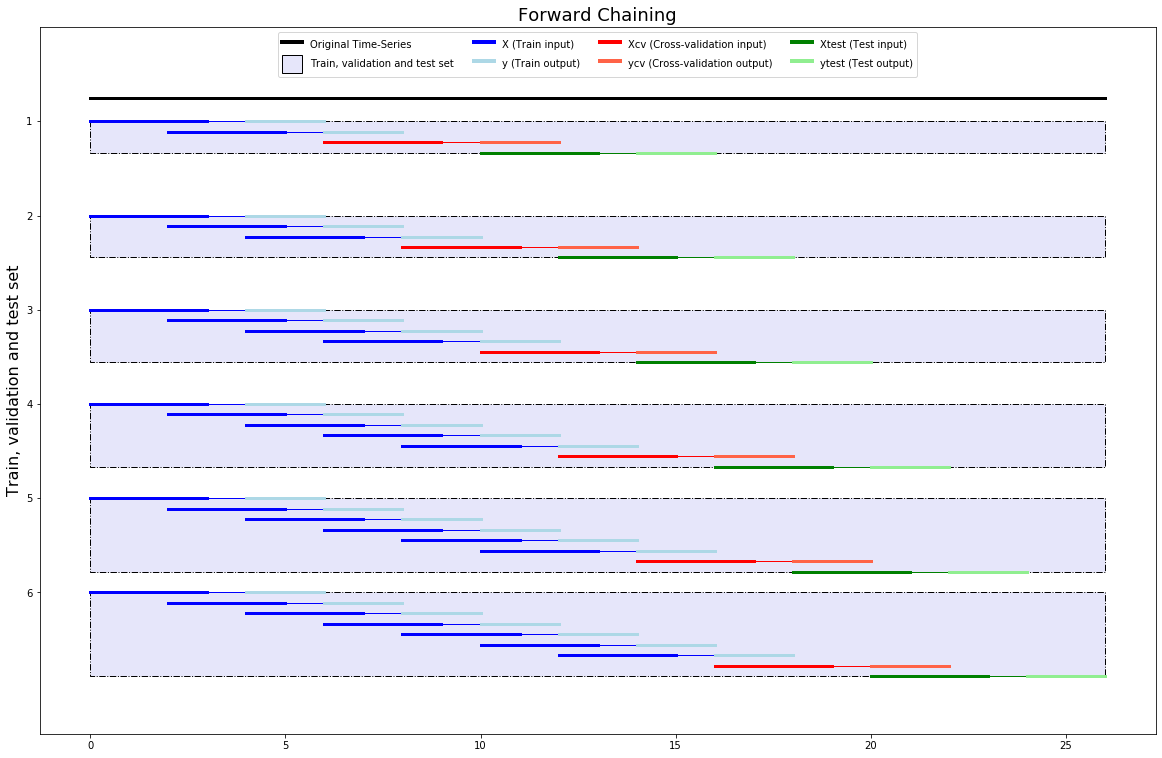

In [52]:
X, y, Xcv, ycv, Xtest, ytest = splitTrainValTest.split_train_val_test_forwardChaining(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)

show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, 5)
    
plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, "Forward Chaining")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
Xtest[1] = [10 11 12 13]
ytest[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [18 19 20 21] [20 21 22 23]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [22 23 24] [24 25 26]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
Xtest[3] = [14 15 16 17]
ytest[3] = [18 19 20]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [20 21 22 23]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [24 25 26]
Xcv[4] = [12 13 14 15]
ycv[4] = [16 17 18]
Xtest[4

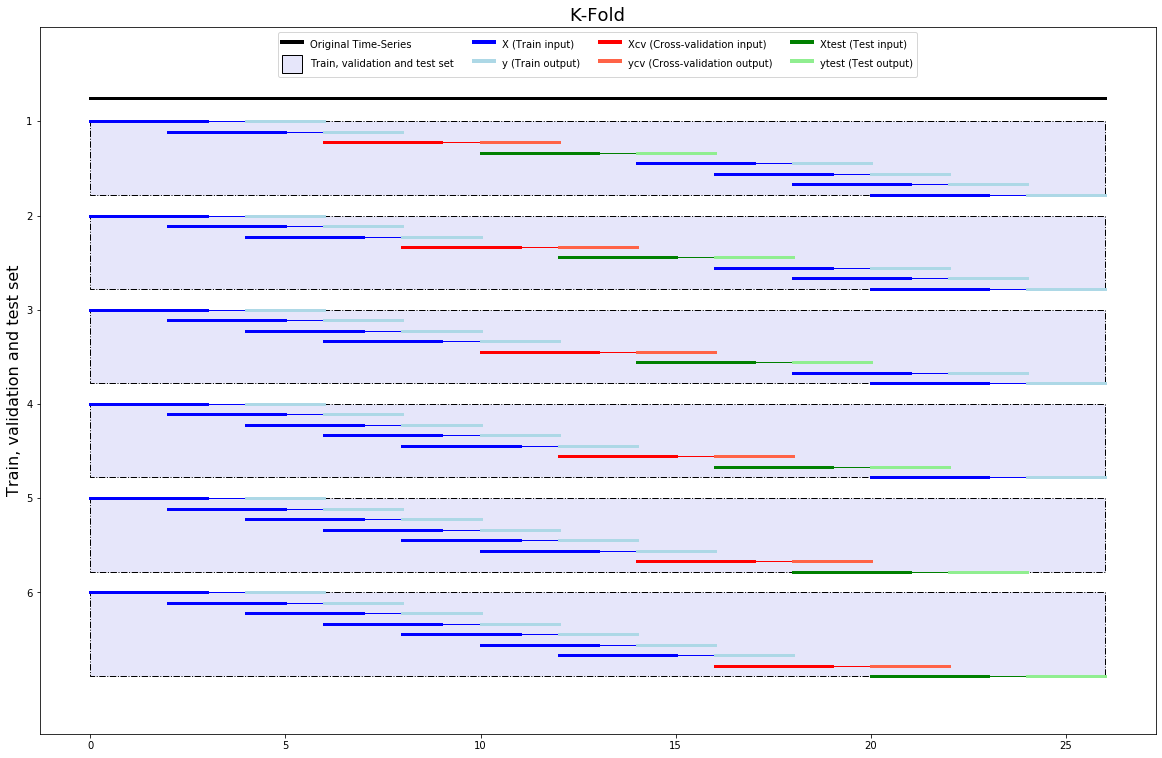

In [53]:
X, y, Xcv, ycv, Xtest, ytest = splitTrainValTest.split_train_val_test_kFold(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)

show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, 5)
    
plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, "K-Fold")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [22 23 24] [24 25 26]
Xcv[1] = [10 11 12 13]
ycv[1] = [14 15 16]
Xtest[1] = [14 15 16 17]
ytest[1] = [18 19 20]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[3] = [4 5 6] [6 7 8] [18 19 20] [20 21 22] [22 23 24]
Xcv[3] = [6 7 8 9]
ycv[3] = [10 11 12]
Xtest[3] = [10 11 12 13]
ytest[3] = [14 15 16]
--------- SET 4 ---------
X[4] = [0 1 2 3] [12 13 14 15] [14 15 16 17] [16 17 18 19]
y[4] = [4 5 6] [16 17 18] [18 19 20] [20 21 22]
Xcv[4] = [4 5 6 7] [20 21 22 23]
ycv[4] = [ 8  9 10] [24 25 26]
Xtest[4] = [ 8  9 10 11]
ytest[4] = [12 13 14]

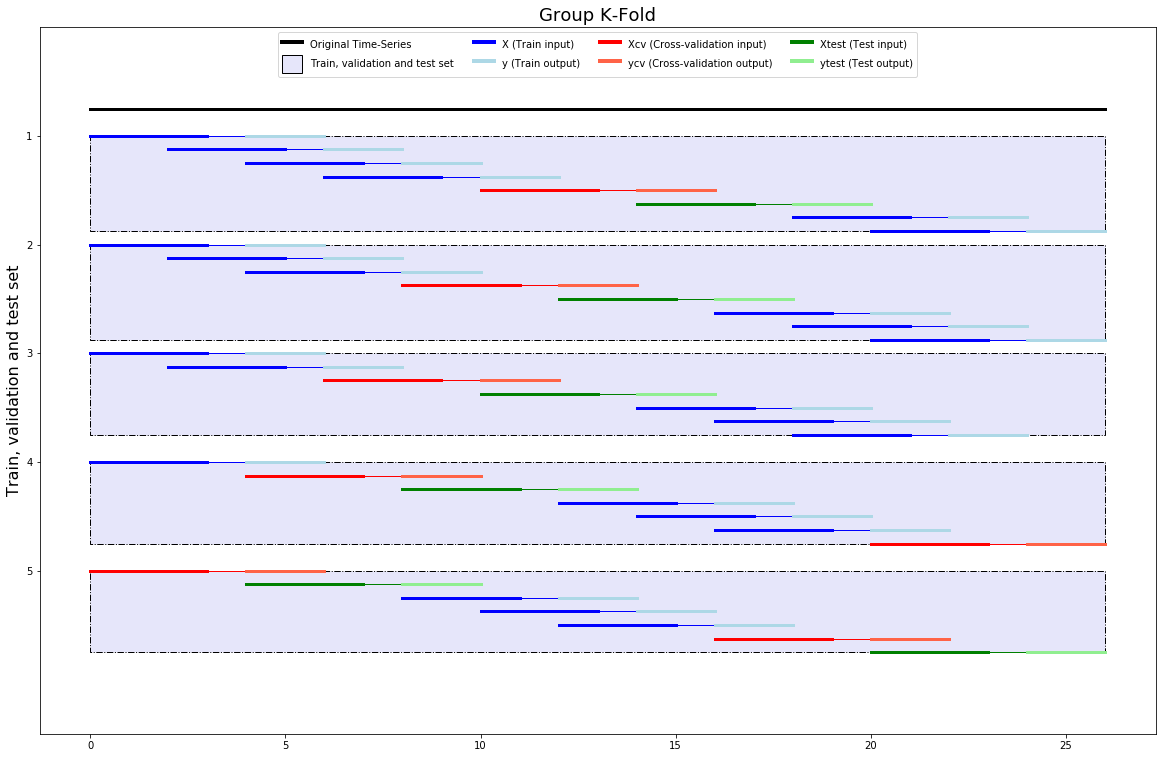

In [54]:
X, y, Xcv, ycv, Xtest, ytest = splitTrainValTest.split_train_val_test_groupKFold(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)

show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, 5)
    
plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, "Group K-Fold")